# SI 650 / EECS 549: Homework 1

## Probabilities, Text, and Ranking

Name: Ruge Xu

Uniqname: rugexu

Student ID: 11022581

In [1]:
from IPython.display import Latex

### Problem 1

#### a) 

|  S   | P(B=1\|S) | P(U=1\|S) | P(E=1\|S) | prior P(S) |
| :--: | :-------: | :-------: | :-------: | :--------: |
|  1   |  0.71428  |  0.71428  |  0.42857  |  0.58333   |
|  0   |  0.40000  |  0.60000  |  0.40000  |  0.41667   |

#### b)

$$
\begin{aligned}
P(S=1|B=0,U=1,E=0)&=\frac{P(B=0,U=1,E=0|S=1)*P(S=1)}{P(B=0,U=1,E=0)}\\
&=\frac{P(B=0|S=1)P(U=1|S=1)P(E=0|S=1)*P(S=1)}{P(B=0,U=1,E=0)}\\
&=\frac{\frac{2}{7}\times\frac{5}{7}\times\frac{4}{7}\times \frac{7}{12}}{P(B=0,U=1,E=0)}\\
&= \frac{10}{147}k
\end{aligned}
$$

$$
\begin{aligned}
P(S=0|B=0,U=1,E=0)&=\frac{P(B=0,U=1,E=0|S=0)*P(S=0)}{P(B=0,U=1,E=0)}\\
&=\frac{P(B=0|S=0)P(U=1|S=0)P(E=0|S=0)*P(S=0)}{P(B=0,U=1,E=0)}\\
&=\frac{\frac{3}{5}\times\frac{3}{5}\times\frac{3}{5}\times \frac{5}{12}}{P(B=0,U=1,E=0)}\\
&=\frac{9}{100}k
\end{aligned}
$$

As we know, $P(S=1|B=0,U=1,E=0) + P(S=0|B=0,U=1,E=0)=1$,

Therefore,

$$
\begin{aligned}
P(S=1|B=0,U=1,E=0)&=0.43048\\
P(S=0|B=0,U=1,E=0)&=0.56952
\end{aligned}
$$

We can find that 

$$
P(S=1|B=0,U=1,E=0)<P(S = 0|B = 0,U = 1,E = 0)
$$

Thus account $a$ is not a spam.

#### c)

$$
P(S = 1|B = 0,U = 1,E = 0)=1\\
P(S = 0|B = 0,U = 1,E = 0)=0\\
$$

The result is different from the previous.

This is because the number of samples is too small. There's only one sample condition that B=0, U=1, E=0. The result is not representative.

#### d)

There is one constraint on the values:

$$
P(S=1)+P(S=0)=1
$$

#### e)

I can change the value E of the 4th sample. Then Table 2 becomes:

|  S   | P(B=1\|S) | P(U=1\|S) | P(E=1\|S) | prior P(S) |
| :--: | :-------: | :-------: | :-------: | :--------: |
|  1   |  0.71428  |  0.71428  |  0.42857  |  0.58333   |
|  0   |  0.40000  |  0.60000  |  0.60000  |  0.41667   |

And the probability $P(S=0 | B=0, U=1, E=0)$ become:

$$
\begin{aligned}
P(S=0|B=0,U=1,E=0)&=\frac{P(B=0,U=1,E=0|S=0)*P(S=0)}{P(B=0,U=1,E=0)}\\
&=\frac{P(B=0|S=0)P(U=1|S=0)P(E=0|S=0)*P(S=0)}{P(B=0,U=1,E=0)}\\
&=\frac{\frac{3}{5}\times\frac{3}{5}\times\frac{2}{5}\times \frac{5}{12}}{P(B=0,U=1,E=0)}\\
&=\frac{3}{50}k
\end{aligned}
$$

Therefore,

$$
\begin{aligned}
P(S=1|B=0,U=1,E=0)&=0.53135\\
P(S=0|B=0,U=1,E=0)&=0.46865
\end{aligned}
$$

As $P(S=1|B=0,U=1,E=0)>P(S = 0|B = 0,U = 1,E = 0)$, the account $a$ is a spam.

#### f)

In reality, even if the status whether a account is a spam is known, the values of B, U, and E may still be dependent on each other. For example, if an account uses a URL, he/she may be less likely to use emoji.

### Problem 2

#### 1.

In [2]:
import spacy
from collections import Counter
import matplotlib.pyplot as plt

In [3]:
nlp = spacy.load('en_core_web_sm')

In [4]:
stop_words = open("stoplist.txt").read()

In [5]:
stop_words = nlp(stop_words)

In [6]:
nlp.Defaults.stop_words = stop_words

In [7]:
def is_word(token):
    if token.is_stop != True and token.pos_ != "PUNCT" and token.pos_ != "SYM" and token.pos_!="NUM" and token.is_punct != True and token.like_url != True and token.like_num != True and token.like_email != True:
        return True
    else:
        return False

In [8]:
def count_words(file):
    word_freq = Counter([])
    while 1:
        line = file.readline()
        if not line:
            break
        line = line.replace('\n', '')
        line = nlp(line)
        words = [token.text for token in line if is_word(token)]
        word_freq += Counter(words)
    return word_freq.most_common()

In [9]:
def count_base_words(file):
    word_freq = Counter([])
    while 1:
        line = file.readline()
        if not line:
            break
        line = line.replace('\n', '')
        line = nlp(line)
        words = [token.lemma_ for token in line if is_word(token)]
        word_freq += Counter(words)
    return word_freq.most_common()

The frequency distribution of words in Reddit questions after the removal of the stopwords:

(The tokens that are numbers, urls, emails, symbols and punctuations are also removed.)

In [10]:
questions = open("si650-f21-reddit-questions.txt")
question_word_freq = count_words(questions)
questions.close()

The frequency distribution of base words with no inflectional suffixes in Reddit questions after the removal of the stopwords:

(The tokens that are numbers, urls, emails, symbols and punctuations are also removed.)

In [11]:
questions = open("si650-f21-reddit-questions.txt")
question_base_word_freq = count_base_words(questions)
questions.close()

The first 20 most-frequent base words in Reddit questions:

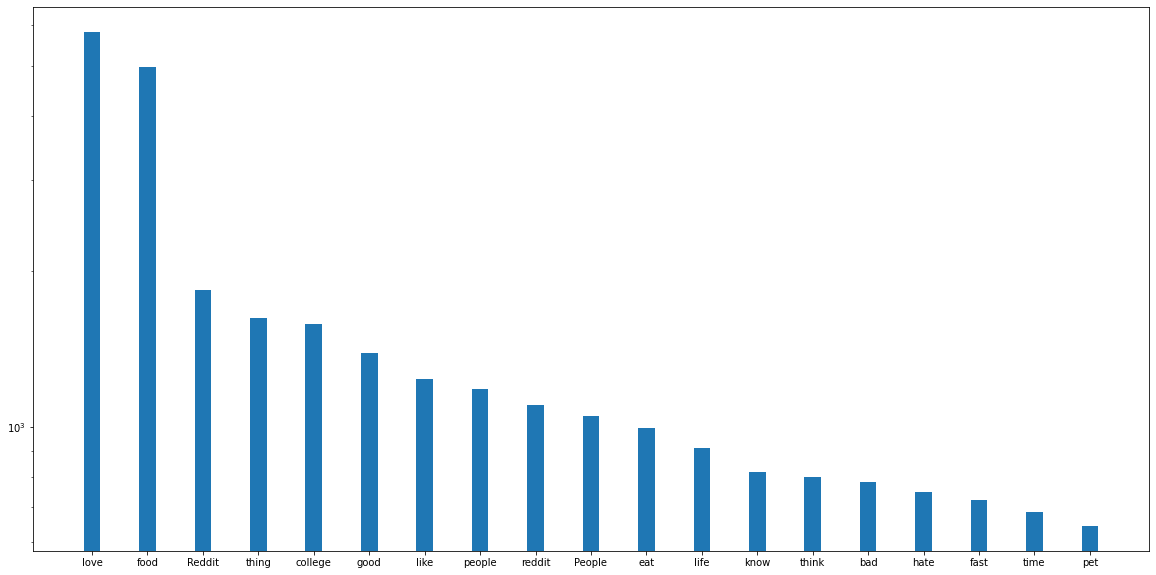

In [12]:
words = [word[0] for word in question_base_word_freq]
freqs = [word[1] for word in question_base_word_freq]
plt.figure(figsize=(20,10))
plt.bar(range(1, 20), height = freqs[0:19], tick_label = words[0:19], width = 0.3, log = True)
plt.show()

The frequency distribution of base words in Reddit questions:

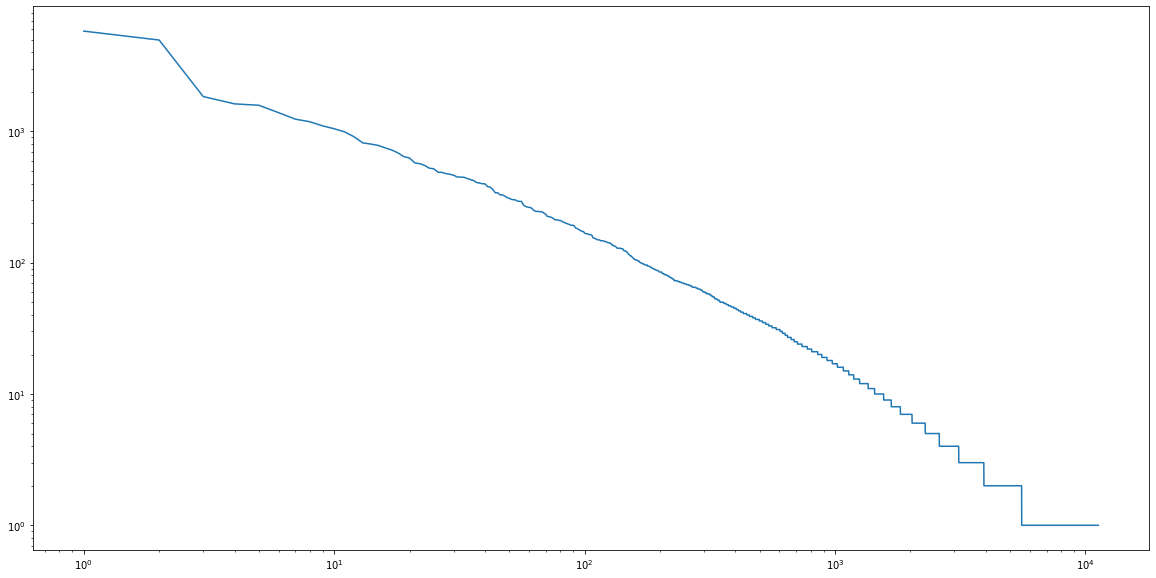

In [13]:
freqs = [word[1] for word in question_base_word_freq]
plt.figure(figsize=(20,10))
plt.plot(range(1, len(freqs)+1), freqs)
plt.xscale('log')
plt.yscale('log')
plt.show()

The frequency distribution of words in Wiki bios after the removal of the stopwords:

(The tokens that are numbers, urls, emails, symbols and punctuations are also removed.)

In [14]:
bios = open("si650.f21.wiki-bios.10k.txt")
bio_word_freq = count_words(bios)
bios.close()

The frequency distribution of base words with no inflectional suffixes in Wiki bios after the removal of the stopwords:

(The tokens that are numbers, urls, emails, symbols and punctuations are also removed.)

In [15]:
bios = open("si650.f21.wiki-bios.10k.txt")
bio_base_word_freq = count_base_words(bios)
bios.close()

The first 20 most-frequent base words in Wiki bios:

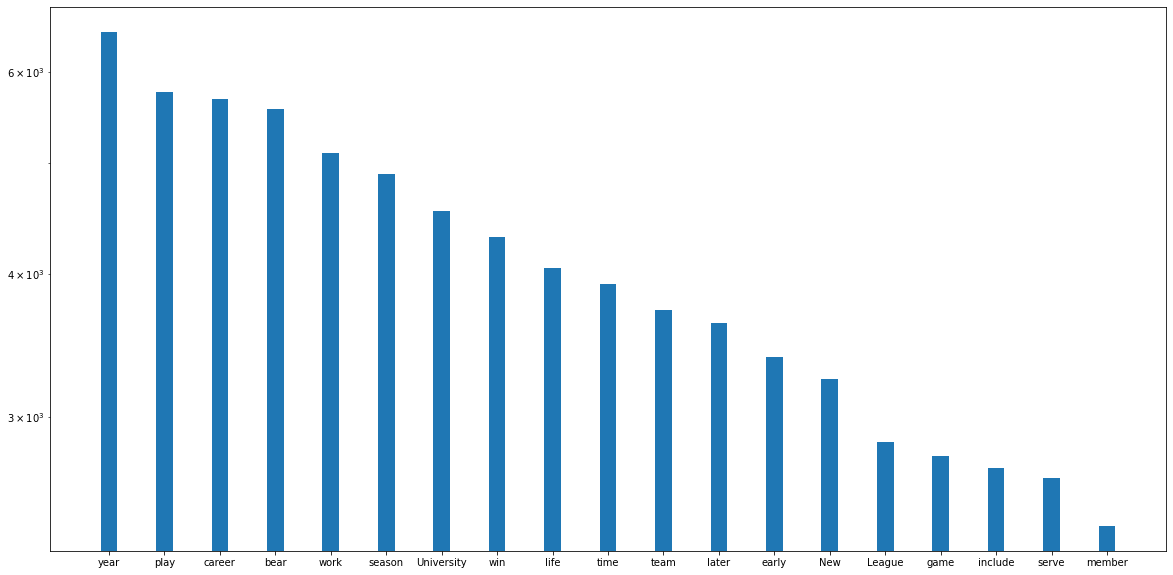

In [16]:
words = [word[0] for word in bio_base_word_freq]
freqs = [word[1] for word in bio_base_word_freq]
plt.figure(figsize=(20,10))
plt.bar(range(1, 20), height = freqs[0:19], tick_label = words[0:19], width = 0.3, log = True)
plt.show()

The frequency distribution of base words in Wiki bios:

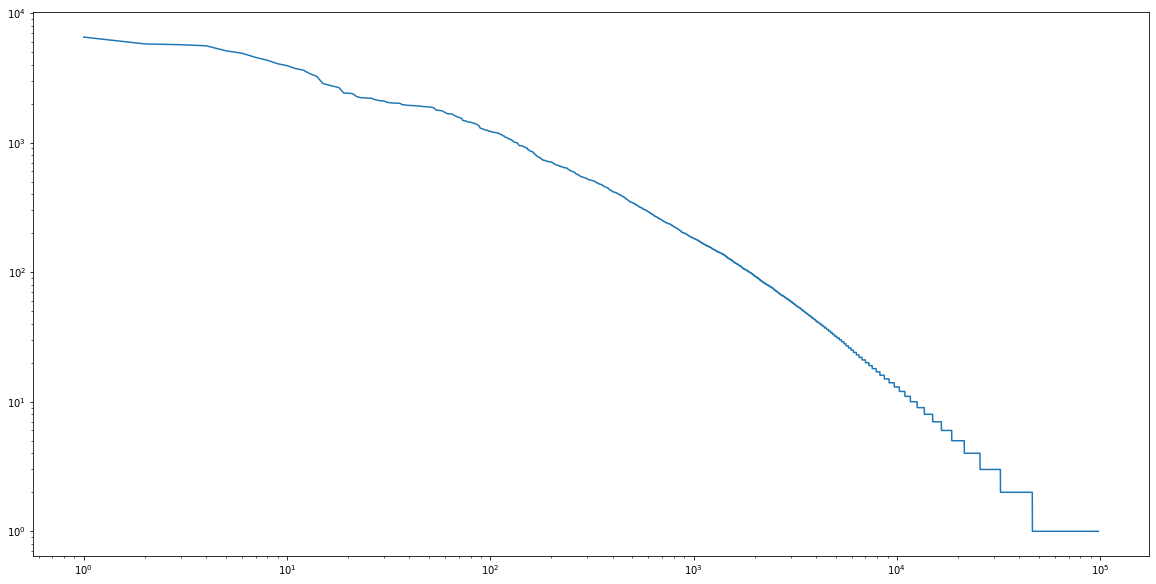

In [17]:
freqs = [word[1] for word in bio_base_word_freq]
plt.figure(figsize=(20,10))
plt.plot(range(1, len(freqs)+1), freqs)
plt.xscale('log')
plt.yscale('log')
plt.show()

The two distributions all look like a power-law distribution. They have very similar shapes.

#### 2.

##### a)

In [18]:
def count_stopwords(file):
    stopword_freq = Counter([])
    while 1:
        line = file.readline()
        if not line:
            break
        line = line.replace('\n', '')
        line = nlp(line)
        stopwords = [token.text for token in line if token.is_stop == True]
        stopword_freq += Counter(stopwords)
    return stopword_freq.most_common()

The number of stopwords in Reddit questions:

In [19]:
questions = open("si650-f21-reddit-questions.txt")
question_stopword_freq = count_stopwords(questions)
questions.close()

In [20]:
freqs = [word[1] for word in question_stopword_freq]
stopword_num = sum(freqs)
stopword_num

184806

The number of non-stop words in Reddit questions:

In [21]:
freqs = [word[1] for word in question_word_freq]
word_num = sum(freqs)
word_num

121272

The frequency of stopwords in Reddit questions:

In [22]:
stopword_num / (stopword_num + word_num)

0.6037872699115912

The number of stopwords in Wiki bios:

In [23]:
bios = open("si650.f21.wiki-bios.10k.txt")
bio_stopword_freq = count_stopwords(bios)
bios.close()

In [24]:
freqs = [word[1] for word in bio_stopword_freq]
stopword_num = sum(freqs)
stopword_num

932821

The number of non-stop words in Wiki bios:

In [25]:
freqs = [word[1] for word in bio_word_freq]
word_num = sum(freqs)
word_num

1170144

The frequency of stopwords in Wiki bios:

In [26]:
stopword_num / (stopword_num + word_num)

0.4435741916769894

These two frequencies are different. This is probability because the Reddit questions are more mundane, while the Wiki bios are more written. Thus the Wiki bios' frequency of stopwords is lower than that of the Reddit questions.

##### b)

In [27]:
def count_capital_helper(word):
    count = 0
    for i in word:
        if i.isupper():
            count += 1
    return count

In [28]:
def count_capital(word_freq):
    count = 0
    for word, freq in word_freq:
        count += freq * count_capital_helper(word)
    return count

In [29]:
def count_letter_helper(word):
    count = 0
    for i in word:
        if i.isalpha():
            count += 1
    return count

In [30]:
def count_letter(word_freq):
    count = 0
    for word, freq in word_freq:
        count += freq * count_letter_helper(word)
    return count

The percentage of capital letters in the Reddit questions:

In [31]:
question_captical_count = count_capital(question_word_freq) + count_capital(question_stopword_freq)
question_captical_count

37326

In [32]:
question_letter_count = count_letter(question_word_freq) + count_letter(question_stopword_freq)
question_letter_count

1276642

In [33]:
question_captical_count / question_letter_count

0.029237640622821432

The percentage of capital letters in the Wiki bios:

In [34]:
bio_captical_count = count_capital(bio_word_freq) + count_capital(bio_stopword_freq)
bio_captical_count

685829

In [35]:
bio_letter_count = count_letter(bio_word_freq) + count_letter(bio_stopword_freq)
bio_letter_count

10190482

In [36]:
bio_captical_count / bio_letter_count

0.0673009382676894

We can see that the Wiki bios have a higher percentage of capital letter than the Reddit questions. This may be due to the fact that the Wiki bios contains a large number of names.

##### c)

The number of characters in the Reddit questions is:

In [37]:
question_letter_count

1276642

The number of words in the Reddit questions is:

In [38]:
word_freqs = [word[1] for word in question_word_freq]
question_word_num = sum(word_freqs)
stopword_freqs = [word[1] for word in question_stopword_freq]
question_word_num += sum(stopword_freqs)
question_word_num

306078

The average number of characters per word in the Reddit questions is:

In [39]:
question_letter_count / question_word_num

4.170969491436823

The number of characters in the Wiki bios is:

In [40]:
bio_letter_count

10190482

The number of words in the Wiki bios is:

In [41]:
word_freqs = [word[1] for word in bio_word_freq]
bio_word_num = sum(word_freqs)
stopword_freqs = [word[1] for word in bio_stopword_freq]
bio_word_num += sum(stopword_freqs)
bio_word_num

2102965

The average number of characters per word in the Wiki bios is:

In [42]:
bio_letter_count / bio_word_num

4.845768712270532

The Wiki bios has a bit higher average number of characters per word than the Reddit questions. This may also because the Wiki bios contains more names.

##### d)

The nouns, adjectives, verbs, adverbs, and pronouns in the Reddit questions:

In [43]:
def classify_word(file):
    word_dict = {'NOUN': Counter([]), 'ADJ': Counter([]), 'VERB': Counter([]), 'ADV': Counter([]), 'PRON': Counter([])}
    while 1:
        line = file.readline()
        if not line:
            break
        line = line.replace('\n', '')
        line = nlp(line)
        for token in line:
            if token.pos_ == 'NOUN':
                word_dict['NOUN'] += Counter([token.lemma_])
            elif token.pos_ == 'ADJ':
                word_dict['ADJ'] += Counter([token.lemma_])
            elif token.pos_ == 'VERB':
                word_dict['VERB'] += Counter([token.lemma_])
            elif token.pos_ == 'ADV':
                word_dict['ADV'] += Counter([token.lemma_])
            elif token.pos_ == 'PRON':
                word_dict['PRON'] += Counter([token.lemma_])
    return word_dict

In [44]:
questions = open("si650-f21-reddit-questions.txt")
question_word_dict = classify_word(questions)
questions.close()

The nouns count in the Reddit questions:

In [45]:
noun_word_freq = question_word_dict['NOUN'].most_common()
word_freqs = [word[1] for word in noun_word_freq]
question_noun_num = sum(word_freqs)
question_noun_num

58862

The adjectives count in the Reddit questions:

In [46]:
adj_word_freq = question_word_dict['ADJ'].most_common()
word_freqs = [word[1] for word in adj_word_freq]
question_adj_num = sum(word_freqs)
question_adj_num

21398

The verbs count in the Reddit questions:

In [47]:
verb_word_freq = question_word_dict['VERB'].most_common()
word_freqs = [word[1] for word in verb_word_freq]
question_verb_num = sum(word_freqs)
question_verb_num

44044

The adverbs count in the Reddit questions:

In [48]:
adverb_word_freq = question_word_dict['ADV'].most_common()
word_freqs = [word[1] for word in adverb_word_freq]
question_adverb_num = sum(word_freqs)
question_adverb_num

18863

The pronouns count in the Reddit questions:

In [49]:
pronoun_word_freq = question_word_dict['PRON'].most_common()
word_freqs = [word[1] for word in pronoun_word_freq]
question_pronoun_num = sum(word_freqs)
question_pronoun_num

43519

The total word count in the Reddit questions:

In [50]:
question_total_num = question_word_num
question_total_num

306078

In [51]:
question_noun_num / question_total_num

0.1923104568116624

In [52]:
question_adj_num / question_total_num

0.06991028430661465

In [53]:
question_verb_num / question_total_num

0.14389796065055313

In [54]:
question_adverb_num / question_total_num

0.06162808173080064

In [55]:
question_pronoun_num / question_total_num

0.14218271159639045

In [56]:
bios = open("si650.f21.wiki-bios.10k.txt")
bio_word_dict = classify_word(bios)
bios.close()

The nouns count in the Wiki bios:

In [57]:
noun_word_freq = bio_word_dict['NOUN'].most_common()
word_freqs = [word[1] for word in noun_word_freq]
bio_noun_num = sum(word_freqs)
bio_noun_num

358568

The adjectives count in the Wiki bios:

In [58]:
adj_word_freq = bio_word_dict['ADJ'].most_common()
word_freqs = [word[1] for word in adj_word_freq]
bio_adj_num = sum(word_freqs)
bio_adj_num

120410

The verbs count in the Wiki bios:

In [59]:
verb_word_freq = bio_word_dict['VERB'].most_common()
word_freqs = [word[1] for word in verb_word_freq]
bio_verb_num = sum(word_freqs)
bio_verb_num

206864

The adverbs count in the Wiki bios:

In [60]:
adverb_word_freq = bio_word_dict['ADV'].most_common()
word_freqs = [word[1] for word in adverb_word_freq]
bio_adverb_num = sum(word_freqs)
bio_adverb_num

55799

The pronouns count in the Wiki bios:

In [61]:
pronoun_word_freq = bio_word_dict['PRON'].most_common()
word_freqs = [word[1] for word in pronoun_word_freq]
bio_pronoun_num = sum(word_freqs)
bio_pronoun_num

72369

The total word count in the Wiki bios:

In [62]:
bio_total_num = bio_word_num
bio_total_num

2102965

In [63]:
bio_noun_num / bio_total_num

0.17050592853423618

In [64]:
bio_adj_num / bio_total_num

0.05725725344929659

In [65]:
bio_verb_num / bio_total_num

0.0983677807286379

In [66]:
bio_adverb_num / bio_total_num

0.026533489620607094

In [67]:
bio_pronoun_num / bio_total_num

0.034412840917466526

##### e)

The top 10 nouns in the Reddit questions:

In [68]:
question_word_dict['NOUN'].most_common(10)

[('food', 4948),
 ('love', 1888),
 ('thing', 1623),
 ('college', 1574),
 ('people', 1186),
 ('People', 1030),
 ('reddit', 971),
 ('life', 912),
 ('time', 681),
 ('story', 576)]

The top 10 verbs in the Reddit questions:

In [69]:
question_word_dict['VERB'].most_common(10)

[('love', 3927),
 ('would', 2260),
 ('make', 1363),
 ('’', 1327),
 ('can', 1169),
 ('eat', 993),
 ('have', 840),
 ('know', 817),
 ('go', 815),
 ('think', 800)]

The top 10 adjectives in the Reddit questions:

In [70]:
question_word_dict['ADJ'].most_common(10)

[('good', 1373),
 ('bad', 782),
 ('fast', 697),
 ('weird', 628),
 ('favorite', 545),
 ('serious', 504),
 ('other', 462),
 ('first', 383),
 ('most', 338),
 ('high', 214)]

The top 10 nouns in the Wiki bios:

In [71]:
bio_word_dict['NOUN'].most_common(10)

[('year', 6501),
 ('career', 5672),
 ('season', 4846),
 ('life', 4050),
 ('time', 3912),
 ('team', 3537),
 ('game', 2765),
 ('member', 2412),
 ('club', 2198),
 ('goal', 2145)]

The top 10 verbs in the Wiki bios:

In [72]:
bio_word_dict['VERB'].most_common(10)

[('bear', 5566),
 ('play', 5214),
 ('become', 4147),
 ('make', 4081),
 ('win', 3442),
 ('work', 3041),
 ('include', 2710),
 ('serve', 2652),
 ('die', 2392),
 ('take', 2339)]

The top 10 adjectives in the Wiki bios:

In [73]:
bio_word_dict['ADJ'].most_common(10)

[('first', 6048),
 ('early', 3054),
 ('second', 1894),
 ('other', 1669),
 ('new', 1427),
 ('former', 1362),
 ('several', 1303),
 ('personal', 1287),
 ('high', 1278),
 ('-', 1204)]

#### 3.

First find the document frequency of each term $t$ in the collection:

In [74]:
import math
import heapq

In [75]:
def is_stopword_or_word(token):
    if token.pos_ != "PUNCT" and token.pos_ != "SYM" and token.pos_!="NUM" and token.is_punct != True and token.like_url != True and token.like_num != True and token.like_email != True:
        return True
    else:
        return False

In [76]:
def find_doc_freq(file):
    word_freq = Counter([])
    while 1:
        line = file.readline()
        if not line:
            break
        line = line.replace('\n', '')
        line = nlp(line)
        words = [token.lemma_ for token in line if is_stopword_or_word(token)]
        word_freq += Counter(set(words))
    return word_freq.most_common()

In [77]:
bios = open("si650.f21.wiki-bios.10k.txt")
bio_doc_freq = find_doc_freq(bios)
bios.close()

Then find the total number of documents in the collection:

In [78]:
N = 0
bios = open("si650.f21.wiki-bios.10k.txt")
while 1:
    line = bios.readline()
    if not line:
        break
    N += 1
bios.close()
N

10000

Then find the frequency count of term $t$ in doc $d$ and the final score of term $t$:

In [79]:
def find_doc_freq(token,doc_freq):
    for word, freq in doc_freq:
        if token == word:
            return freq
    return 0

In [80]:
bios = open("si650.f21.wiki-bios.10k.txt")
for i in range(1,11):
    line = bios.readline()
    line = line.replace('\n', '')
    line = nlp(line)
    words = [token.lemma_ for token in line if is_stopword_or_word(token)]
    freq_count = Counter(words).most_common()
    words = [word[0] for word in freq_count]
    TF = [math.log(word[1] + 1) for word in freq_count]
    IDF = [1 + math.log(N/find_doc_freq(word[0],bio_doc_freq)) for word in freq_count]
    score = list(map(lambda x,y:x*y,TF,IDF))
    word_score = list(map(lambda x,y:(x,y),words,score))
    word_score.sort(key=lambda x:x[1], reverse=True)
    print("The 5 words that have the highest TF-IDF weights in bio %d:" %(i))
    for j in range(0,5):
        print("%d: %s" %(j+1, word_score[j][0]))
bios.close()

The 5 words that have the highest TF-IDF weights in bio 1:
1: Redenti
2: Fischietto
3: Correggio
4: caricature
5: Francesco
The 5 words that have the highest TF-IDF weights in bio 2:
1: Deacon
2: ice
3: Bearcats
4: Winter
5: hockey
The 5 words that have the highest TF-IDF weights in bio 3:
1: Watlington
2: Windglider
3: bermudian
4: windsurfer
5: Hugh
The 5 words that have the highest TF-IDF weights in bio 4:
1: Ershad
2: Jatiya
3: Awami
4: Khaleda
5: Hasina
The 5 words that have the highest TF-IDF weights in bio 5:
1: 임상조
2: jo
3: Sang
4: cyclist
5: korean
The 5 words that have the highest TF-IDF weights in bio 6:
1: Fawzi
2: Najjar
3: Strategist
4: Husayn
5: islamic
The 5 words that have the highest TF-IDF weights in bio 7:
1: Notre
2: Parseghian
3: Dame
4: collin
5: Ara
The 5 words that have the highest TF-IDF weights in bio 8:
1: Reed
2: Glacier
3: photograph
4: Ortonville
5: Montana
The 5 words that have the highest TF-IDF weights in bio 9:
1: rugby
2: code
3: Bridgend
4: union
5:

I find that the words that have the highest TF-IDF weights are alomost names. This is not a good summary of the documents, as I can't guess what the document is from those names.

#### 4.

I'm thinking of a weighting method that combines the user search data. 

When we use TF-IDF weighting method, we may retrieve words that do not have a special meaning. But we can take into account the query used by the users to search for the document. For example, if a user enter a query "university" and click into one document showed by the search engine, then this document is very possibly related with "university". The resulting words will make more sense.

This can be used as a self-correcting weighting algorithm.

### Problem 3

#### 1.

$$
\text{Precision}=\frac{\text{Relevant Retrieved}}{\text{Retrieved}}=\frac{12}{20}=60\%
$$

$$
\text{Recall}=\frac{\text{Relevant Retrieved}}{\text{Relevant}}=\frac{12}{20}=60\%
$$

$$
\text{F1}=\frac{\text{2PR}}{\text{P+R}}=\frac{2\times60\%\times60\%}{60\%+60\%}=60\%
$$

The precisions of the 20 relevant documents are:

$$
p(1)=1,p(2)=\frac{2}{3},p(3)=\frac{3}{4},p(4)=\frac{2}{3}\\
p(5)=\frac{5}{8},p(6)=\frac{2}{3},p(7)=\frac{7}{12},p(8)=\frac{8}{13}\\
p(9)=\frac{9}{16},p(10)=\frac{10}{17},p(11)=\frac{11}{18},p(12)=\frac{12}{19}\\
p(i)=0\text{ for }i=13,\dots,20
$$

$$
\text{MAP}=\frac{1}{20}\sum_{i=1}^{20} p(i)=0.39836
$$

#### 2.

$$
CG_{10}=r_1+\dots+r_{10}=2+0+1+2+0+1+0+2+1+0=9
$$

$$
DCG_{10}=r_1+\frac{r_2}{\log_2(2)}+\dots+\frac{r_{10}}{\log_2(10)}=2+0+\frac{1}{\log_2(3)}+\frac{2}{\log_2(4)}+0+\frac{1}{\log_2(6)}+0+\frac{2}{\log_2(8)}+\frac{1}{\log_2(9)}+0=4.9999
$$

The DCG value at rank n of the ideal ranking is:

$$
IDCG_{10}=2+\frac{2}{\log_2(2)}+\frac{2}{\log_2(3)}+\frac{2}{\log_2(4)}+\frac{2}{\log_2(5)}+\frac{1}{\log_2(6)}+\frac{1}{\log_2(7)}+\dots + \frac{1}{\log_2(10)}=8.8161
$$

$$
NDCG_{10}=\frac{DCG_{10}}{IDCG_{10}}=0.5671
$$

### Problem 4

#### 1.

In [81]:
from sklearn.feature_extraction.text import CountVectorizer
import numpy as np

In [82]:
questions = open("si650-f21-reddit-questions.txt")
corpus = []
while 1:
    line = questions.readline()
    if not line:
        break
    line = line.replace('\n', '')
    corpus.append(line)
questions.close()

In [83]:
stop_words = open("stoplist.txt").read()
stop_words = stop_words.split('\n')
vectorizer = CountVectorizer(stop_words=stop_words)

In [84]:
def cosine_similarity(x, y): 
    zero_list = [0] * len(x)
    if all(x == zero_list) or all(y == zero_list):
        return float(1) if all(x == y) else float(0)
    
    res = np.array([[x[i] * y[i], x[i] * x[i], y[i] * y[i]] for i in range(len(x))])
    cos = sum(res[:, 0]) / (np.sqrt(sum(res[:, 1])) * np.sqrt(sum(res[:, 2])))
    return cos

In [85]:
def find_similar_question(query, k=10):
    distances =[]
    similar_questions = []
    for i in range(0, len(corpus)):
        X = vectorizer.fit_transform([query, corpus[i]])
        distances.append((i, cosine_similarity(X.toarray()[0], X.toarray()[1])))
    distances.sort(key=lambda x:x[1], reverse=True)
    for i in range(0, k):
        similar_questions.append(corpus[distances[i][0]])
    return similar_questions

#### 2.

Query: "programming"

In [86]:
find_similar_question("programming")

/Users/xuruge/opt/anaconda3/lib/python3.8/site-packages/sklearn/feature_extraction/text.py:388: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['doesn'] not in stop_words.
  warnings.warn('Your stop_words may be inconsistent with '


['How to start programming? What are important things i have to learn in programming?',
 'Programmers, what do you like about programming?',
 'Do you like your programming job? If not, why?',
 'I like programming, what other hobbies may I like?',
 'How to start programming?',
 'Which language programming do you prefer?',
 'What is your favorite programming language and why?',
 'What is your best quotes about programming?',
 'Where can i find programming podcast?',
 'Other than programming, what other hobbies may programmers like?']

$$
\begin{aligned}
DCG_{10}&=r_1+\frac{r_2}{\log_2(2)}+\dots+\frac{r_{10}}{\log_2(10)}\\
&=2+\frac{2}{\log_2(2)}+\frac{2}{\log_2(3)}+\frac{0}{\log_2(4)}+\frac{2}{\log_2(5)}+\frac{2}{\log_2(6)}+\frac{1}{\log_2(7)}+\frac{1}{\log_2(8)}+\frac{1}{\log_2(9)}+\frac{0}{\log_2(10)}\\
&=7.9019
\end{aligned}
$$

$$
\begin{aligned}
IDCG_{10}&=2+\frac{2}{\log_2(2)}+\frac{2}{\log_2(3)}+\frac{2}{\log_2(4)}+\frac{2}{\log_2(5)}+\frac{1}{\log_2(6)}+\frac{1}{\log_2(7)}+\frac{1}{\log_2(8)}+\frac{1}{\log_2(9)}+\frac{1}{\log_2(10)}\\
&=8.8161
\end{aligned}
$$

$$
NDCG_{10}=\frac{DCG_{10}}{IDCG_{10}}=0.89630
$$

Query: "pets"

In [87]:
find_similar_question("pets")

['Do you have any pets? If so, what are they like?',
 'What pets do you have? What are they like?',
 'How would it go for you if you woke up as one of your pets, and all your pets became human?',
 'How many pets can you own before it gets to the point where you have too many pets?',
 'If there was a dating app for pets, what would your pets ‘Tell Us About Yourself’ be?',
 'What kind of pets do you dance with?',
 'How many pets have you had? what kind of animals where they?',
 'What are the cleanest pets?',
 "What's your pets name?",
 'May I see a photo of your pets?']

$$
\begin{aligned}
DCG_{10}&=r_1+\frac{r_2}{\log_2(2)}+\dots+\frac{r_{10}}{\log_2(10)}\\
&=2+\frac{2}{\log_2(2)}+\frac{0}{\log_2(3)}+\frac{1}{\log_2(4)}+\frac{0}{\log_2(5)}+\frac{0}{\log_2(6)}+\frac{2}{\log_2(7)}+\frac{2}{\log_2(8)}+\frac{1}{\log_2(9)}+\frac{1}{\log_2(10)}\\
&=6.4955
\end{aligned}
$$

$$
\begin{aligned}
IDCG_{10}&=2+\frac{2}{\log_2(2)}+\frac{2}{\log_2(3)}+\frac{2}{\log_2(4)}+\frac{1}{\log_2(5)}+\frac{1}{\log_2(6)}+\frac{1}{\log_2(7)}+\frac{1}{\log_2(8)}+\frac{1}{\log_2(9)}+\frac{1}{\log_2(10)}\\
&=8.3854
\end{aligned}
$$

$$
NDCG_{10}=\frac{DCG_{10}}{IDCG_{10}}=0.77462
$$

Query: "college"

In [88]:
find_similar_question("college")

['For those with a college degree; do you regret going to college? Why or why not?',
 'College students, how many hours a day do you spend at college?',
 'College graduates, where do you store all your materials after college?',
 'Current college students or college grads: What is (was) your favorite thing about going to college and being on campus?',
 'College attending folks, or those that have attended college, what do you wish someone would have told you prior to starting college?',
 "I'm starting college in a few days and I'm super nervous. What are some do's and dont's at college? Would love some general college advice!",
 "I'm starting college in a few days and I'm super nervous. What are some do's and dont's at college? Would love some general college advice!",
 'College graduates of the 2010s- where are you now? Would you say college was worth it? Why or why not?',
 'How can I finish college?',
 'What got you through college?']

$$
\begin{aligned}
DCG_{10}&=r_1+\frac{r_2}{\log_2(2)}+\dots+\frac{r_{10}}{\log_2(10)}\\
&=1+\frac{2}{\log_2(2)}+\frac{0}{\log_2(3)}+\frac{1}{\log_2(4)}+\frac{2}{\log_2(5)}+\frac{2}{\log_2(6)}+\frac{2}{\log_2(7)}+\frac{1}{\log_2(8)}+\frac{1}{\log_2(9)}+\frac{2}{\log_2(10)}\\
&=6.7649
\end{aligned}
$$

$$
\begin{aligned}
IDCG_{10}&=2+\frac{2}{\log_2(2)}+\frac{2}{\log_2(3)}+\frac{2}{\log_2(4)}+\frac{2}{\log_2(5)}+\frac{1}{\log_2(6)}+\frac{1}{\log_2(7)}+\frac{1}{\log_2(8)}+\frac{1}{\log_2(9)}+\frac{1}{\log_2(10)}\\
&=8.8161
\end{aligned}
$$

$$
NDCG_{10}=\frac{DCG_{10}}{IDCG_{10}}=0.76734
$$

Query: "love"

In [89]:
find_similar_question("love")

['Never been in love',
 'What do you love most about yourself?',
 'What do you love most about your SO?',
 'What do you love most about yourself?',
 'Why do you love me so much?',
 'What do u love to do?',
 'What is love?',
 'What is love to you?',
 'what do you love?',
 'What is love and what is not love?']

$$
\begin{aligned}
DCG_{10}&=r_1+\frac{r_2}{\log_2(2)}+\dots+\frac{r_{10}}{\log_2(10)}\\
&=1+\frac{2}{\log_2(2)}+\frac{2}{\log_2(3)}+\frac{2}{\log_2(4)}+\frac{1}{\log_2(5)}+\frac{1}{\log_2(6)}+\frac{2}{\log_2(7)}+\frac{2}{\log_2(8)}+\frac{1}{\log_2(9)}+\frac{2}{\log_2(10)}\\
&=8.3759
\end{aligned}
$$

$$
\begin{aligned}
IDCG_{10}&=2+\frac{2}{\log_2(2)}+\frac{2}{\log_2(3)}+\frac{2}{\log_2(4)}+\frac{2}{\log_2(5)}+\frac{2}{\log_2(6)}+\frac{1}{\log_2(7)}+\frac{1}{\log_2(8)}+\frac{1}{\log_2(9)}+\frac{1}{\log_2(10)}\\
&=9.2029
\end{aligned}
$$

$$
NDCG_{10}=\frac{DCG_{10}}{IDCG_{10}}=0.91014
$$

Query: "food"

In [90]:
find_similar_question("food")

['If you were a food, what would you be?',
 'What food can you never get enough of? Why is that?',
 'People in food service or food prep, have you ever spit in someone’s food?',
 'What would be too much food for a day? (Give food examples)',
 'If you could eat only one type of food what food would that be and why?',
 'What is your “I love this food so much a could eat it all” food?',
 'What is your “I love this food so much a could eat it all” food?',
 'What are some food vs food debates? Also which side are you on?',
 'Food Now tastes as it smells, what food would you have first and why?',
 'What food would you buy if it was the only food you could ever eat?']

$$
\begin{aligned}
DCG_{10}&=r_1+\frac{r_2}{\log_2(2)}+\dots+\frac{r_{10}}{\log_2(10)}\\
&=0+\frac{2}{\log_2(2)}+\frac{1}{\log_2(3)}+\frac{1}{\log_2(4)}+\frac{2}{\log_2(5)}+\frac{2}{\log_2(6)}+\frac{2}{\log_2(7)}+\frac{1}{\log_2(8)}+\frac{1}{\log_2(9)}+\frac{2}{\log_2(10)}\\
&=6.7292
\end{aligned}
$$

$$
\begin{aligned}
IDCG_{10}&=2+\frac{2}{\log_2(2)}+\frac{2}{\log_2(3)}+\frac{2}{\log_2(4)}+\frac{2}{\log_2(5)}+\frac{1}{\log_2(6)}+\frac{1}{\log_2(7)}+\frac{1}{\log_2(8)}+\frac{1}{\log_2(9)}+\frac{1}{\log_2(10)}\\
&=8.8161
\end{aligned}
$$

$$
NDCG_{10}=\frac{DCG_{10}}{IDCG_{10}}=0.76329
$$

#### 3.

First of all, I feel that my search engine is not fast enough and it takes a lot of time to calculate when a query is entered.

Also, I find that when the query is short, it is easy to have irrelevant documents. For example, when the query is "programming", my search engine will give a relevant document "I like programming, what other hobbies may I like?", which has almost nothing to do with “programming” itself but contains the keyword programming.

#### 4.

In [91]:
def count_terms(corpus, n):
    X = vectorizer.fit_transform(corpus[0:n])
    return len(vectorizer.get_feature_names())

In [92]:
count = []
count.append(count_terms(corpus, 500))
count.append(count_terms(corpus, 1000))
count.append(count_terms(corpus, 5000))
count.append(count_terms(corpus, 10000))
count.append(count_terms(corpus, 20000))
count

[1473, 2325, 6163, 8871, 12568]

In [93]:
import seaborn as sns
import pandas as pd

<AxesSubplot:xlabel='question', ylabel='vocabulary'>

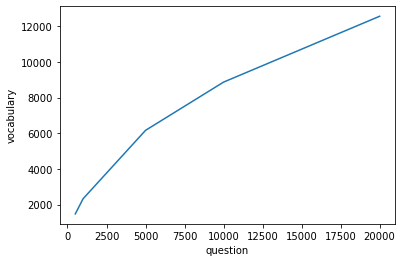

In [94]:
dict = {'question': [500,1000,5000,10000,20000], 'vocabulary': count}
sns.lineplot(x='question', y='vocabulary', data=pd.DataFrame(dict))

From the plot we that the more documents we get, the slower the size of vocabulary rises. We can infer that when the number of documents increases to a certain extent, the upward speed of vocabulary size tends to be flat. As a result, the size of vocabulary is likely to eventually stabilize at a number.